### Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the data 

In [3]:
churn=pd.read_csv("churn.csv")
churn.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the shape of the data
- Churn data contains 7043 rows and 21 columns

In [6]:
churn.shape

(7032, 22)

### Check information about the data
- Total 7043 records and 21 features present in the data
- 3 numerical and 18 categorical columns present

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   customerID        7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


### Check duplicates 
- There are no duplicate values present in the dataset

In [12]:
churn.duplicated().sum()

0

### Check null values
- No null values present in the data

In [15]:
churn.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Check unique values
- Checking unique values in each column

In [18]:
churn.nunique()

Unnamed: 0          7032
customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

### Removing unwanted values
- In totalcharges column there are unwanted characters present
- dropping those rows with unwanted characters and changing the data type of total charges feature

In [21]:
churn=churn[churn["TotalCharges"] != " "]
churn["TotalCharges"]=churn["TotalCharges"].astype(float)

### Saving this csv file 
- Saving this clean csv file for model building

In [24]:
churn.to_csv("churn.csv")

### Check the statistical description

In [26]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Check correlation

In [11]:
churn.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [28]:
cols=["tenure","MonthlyCharges","TotalCharges"]
for i in cols:
    q1 = churn[i].quantile(0.25)
    q3 = churn[i].quantile(0.75)
    iqr = q3-q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    print(i,len(churn[(churn[i]<lower) | (churn[i]>upper)]))
    churn.loc[(churn[i]<lower) | (churn[i]>upper),i]=churn[i].median()
    print(i,len(churn[(churn[i]<lower) | (churn[i]>upper)]))

tenure 0
tenure 0
MonthlyCharges 0
MonthlyCharges 0
TotalCharges 0
TotalCharges 0


### Univariate Numerical Analysis

- **Tenure**
In Tenure feature data is uniformly distributed and no outliers are present ranging from 2 to 70

- **MonthlyCharges**
In monthlycharges data is uniformly distributed and data is ranging from 20 to 120

- **TotalCharges**
In totalcharges the data is little left skewed and data is ranging from 18 to 8000

In [29]:
uni_col=["tenure","MonthlyCharges","TotalCharges"]
for i in uni_col:
    print(churn[i].agg(['min','max','skew','std']))

min      1.000000
max     72.000000
skew     0.237731
std     24.545260
Name: tenure, dtype: float64
min      18.250000
max     118.750000
skew     -0.222103
std      30.085974
Name: MonthlyCharges, dtype: float64
min       18.800000
max     8684.800000
skew       0.961642
std     2266.771362
Name: TotalCharges, dtype: float64


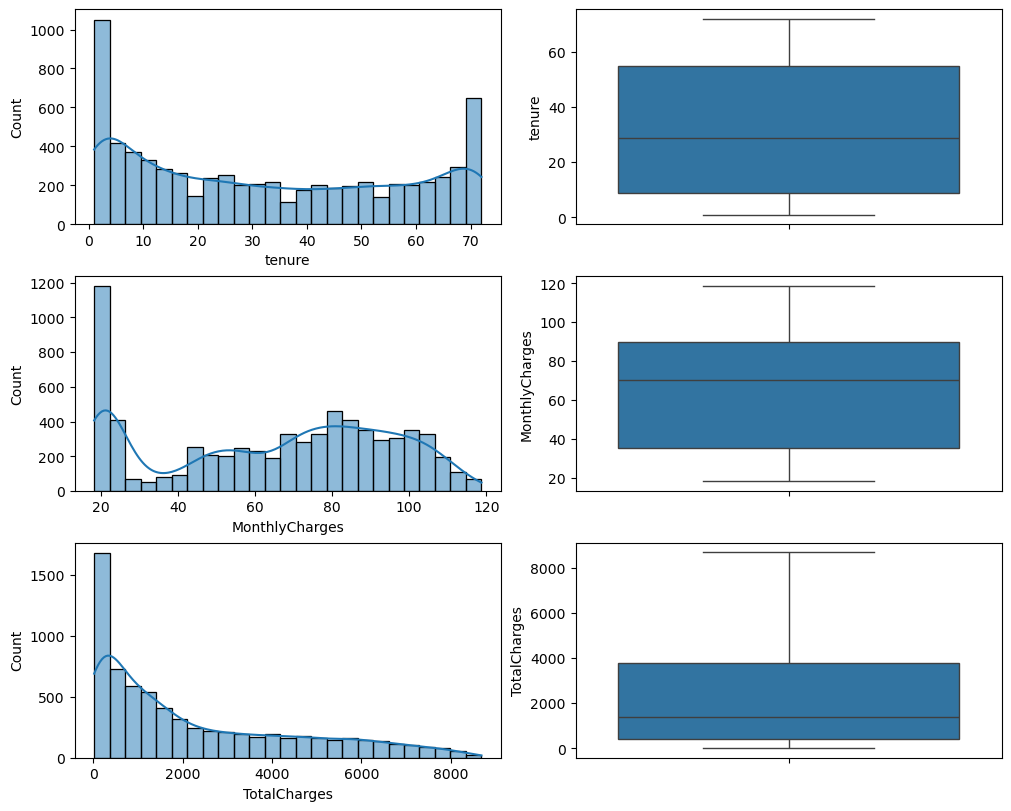

In [30]:
plt.figure(figsize=(10,8), layout="constrained")
plt.subplot(3,2,1)
sns.histplot(churn["tenure"], bins=25, kde=True)
plt.subplot(3,2,2)
sns.boxplot(churn["tenure"])
plt.subplot(3,2,3)
sns.histplot(churn["MonthlyCharges"], bins=25, kde=True)
plt.subplot(3,2,4)
sns.boxplot(churn["MonthlyCharges"])
plt.subplot(3,2,5)
sns.histplot(churn["TotalCharges"], bins=25, kde=True)
plt.subplot(3,2,6)
sns.boxplot(churn["TotalCharges"])
plt.show()

### Univariate Categorical Analysis

**Gender**: The dataset has an almost equal distribution of male (3549) and female (3483) customers.

**SeniorCitizen**: A majority of customers (5890) are not senior citizens.

**Partner**: More than half of the customers (3639) do not have a partner.

**Dependents**: Most customers (4933) do not have dependents.

**PhoneService**: Nearly all customers (6352) have phone service.

**MultipleLines**: A significant portion of customers (2967) have multiple lines, though 680 have no phone service.

**InternetService**: Fiber optic is the most common internet service (3096), followed by DSL and then no internet (1520).

**OnlineSecurity**: The majority (3497) do not have online security services.

**OnlineBackup**: A fairly even split, but slightly more customers (3087) do not use online backup.

**DeviceProtection**: Slightly more customers (3094) do not have device protection than those who do.

**TechSupport**: Most customers (3472) do not use tech support services.

**StreamingTV**: Streaming TV usage is fairly balanced, with 2703 users and 2809 non-users.

**StreamingMovies**: Similar to StreamingTV, with a close count between users (2731) and non-users (2781).

**Contract**: Most customers (3875) are on month-to-month contracts.

**PaperlessBilling**: More customers (4168) prefer paperless billing over traditional billing.

**PaymentMethod**: Electronic check is the most used payment method (2365), followed by mailed check.

**Churn**: The majority of customers (5163) have not churned, but 1869 have.

In [15]:
new1=churn.drop(["customerID","tenure","MonthlyCharges","TotalCharges"], axis=1)
for i in new1.columns:
    print(churn[i].value_counts())
    print("*"*50)

gender
Male      3549
Female    3483
Name: count, dtype: int64
**************************************************
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
**************************************************
Partner
No     3639
Yes    3393
Name: count, dtype: int64
**************************************************
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
**************************************************
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
**************************************************
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
**************************************************
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
**************************************************
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: in

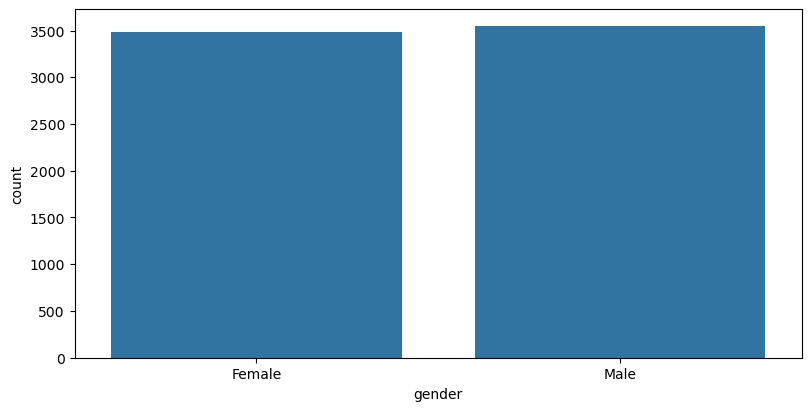

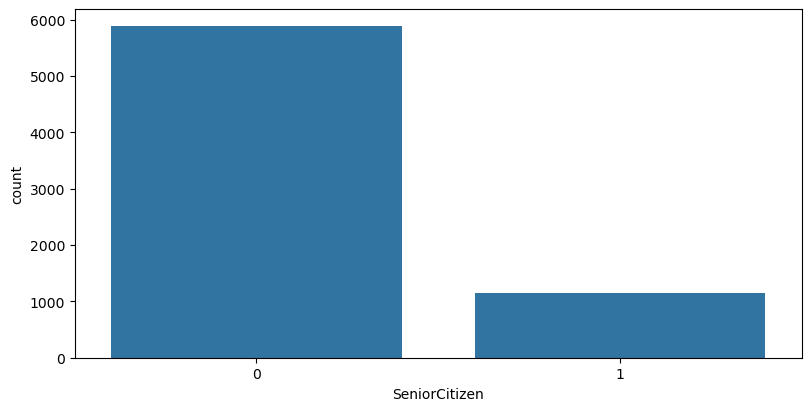

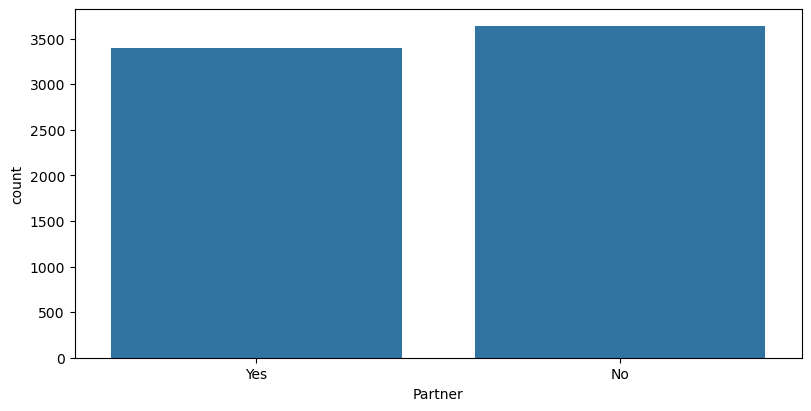

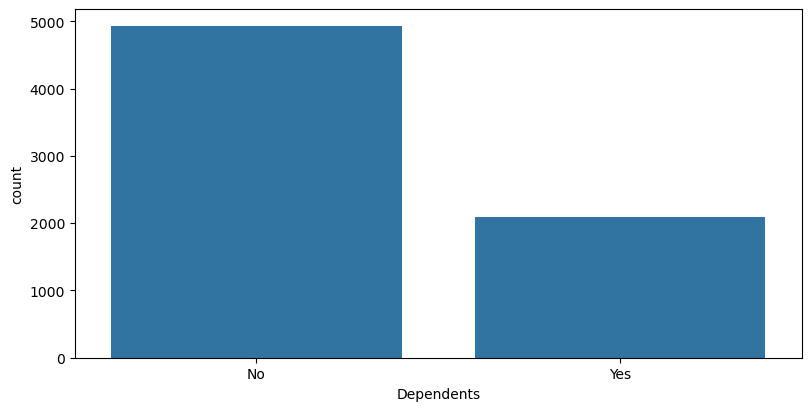

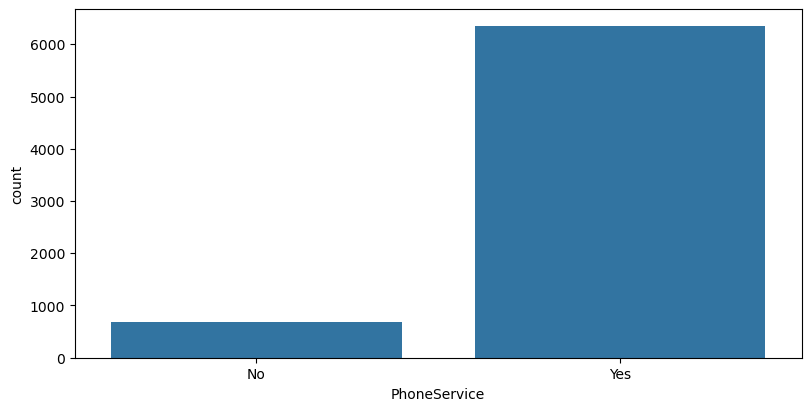

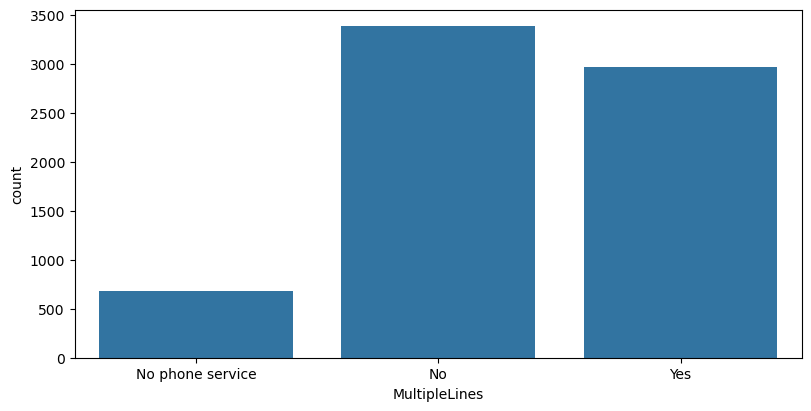

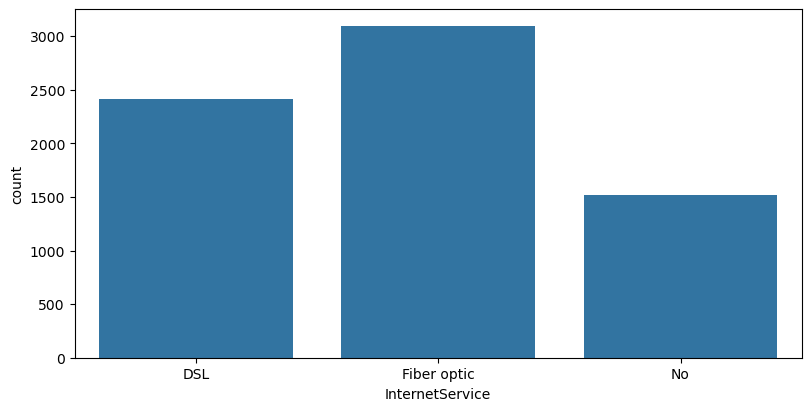

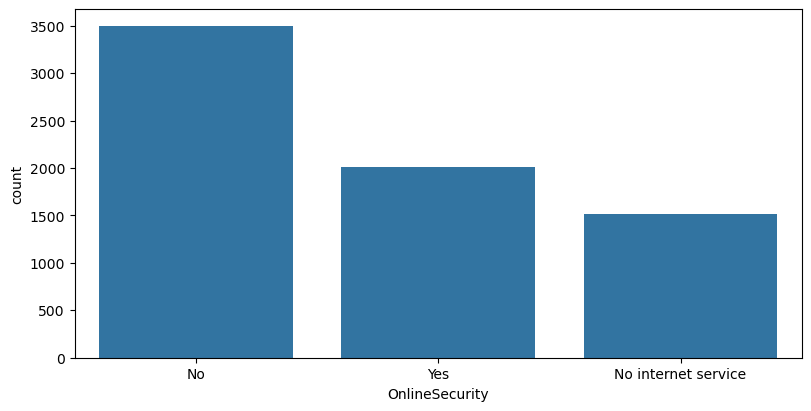

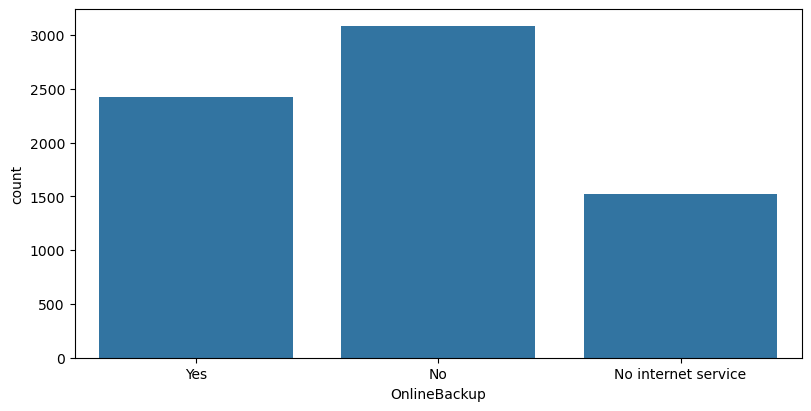

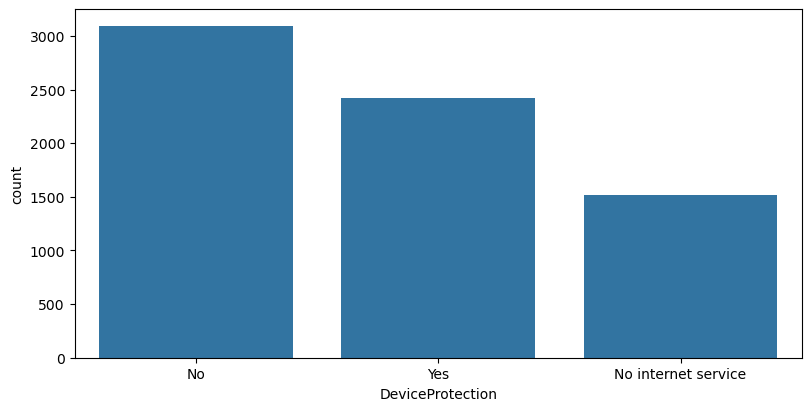

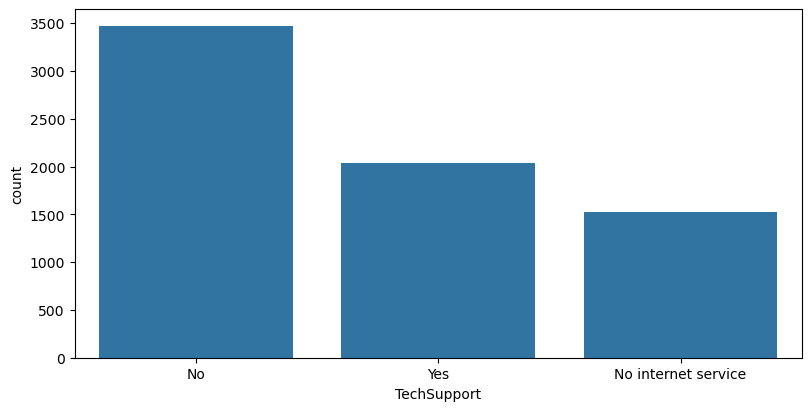

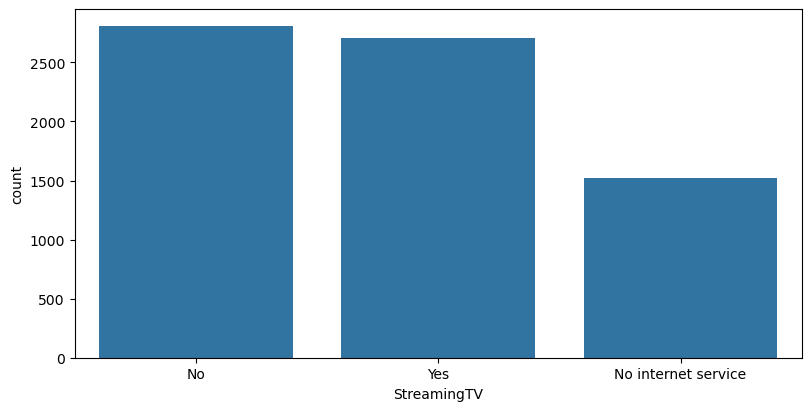

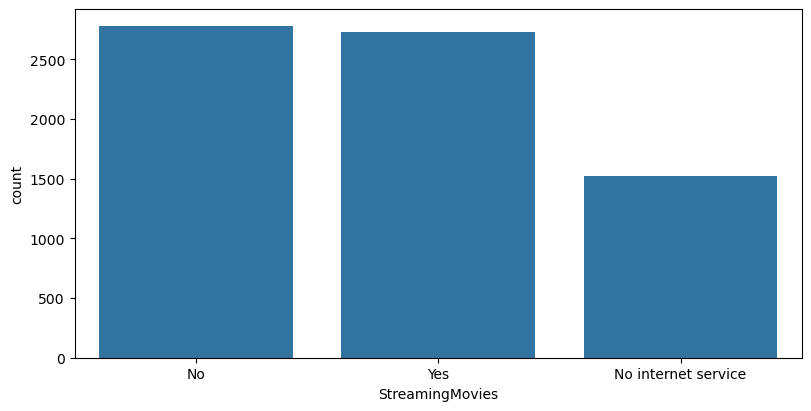

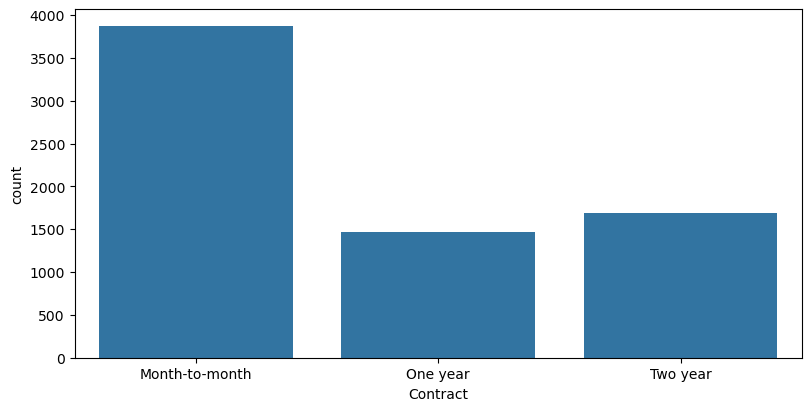

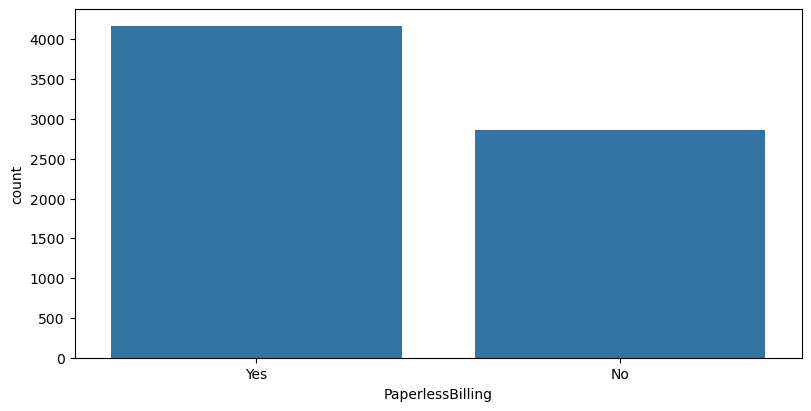

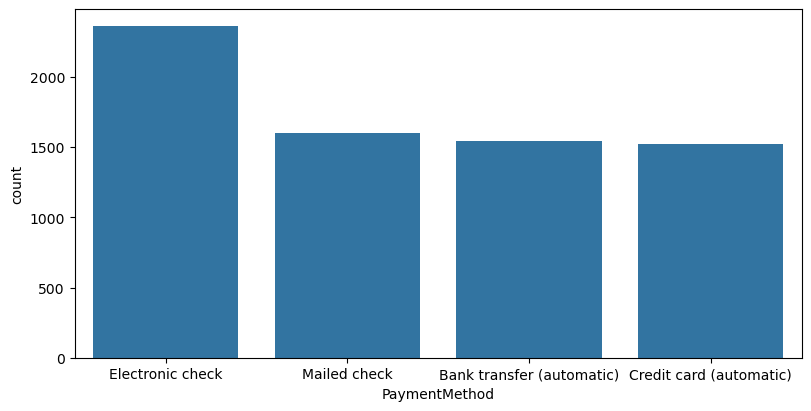

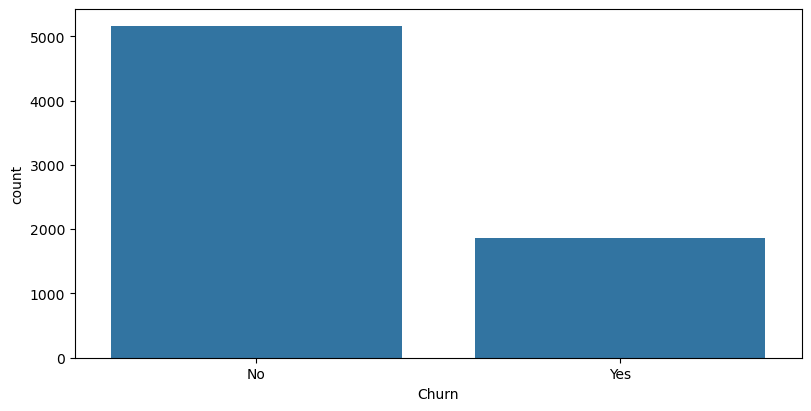

In [16]:
for i in new1.columns:
    plt.figure(figsize=(8,4), layout="constrained")
    sns.countplot(x=new1[i])

## Bivariate Analysis

### Numerical vs Numerical
- comparing two numerical features with the help of scatter plot

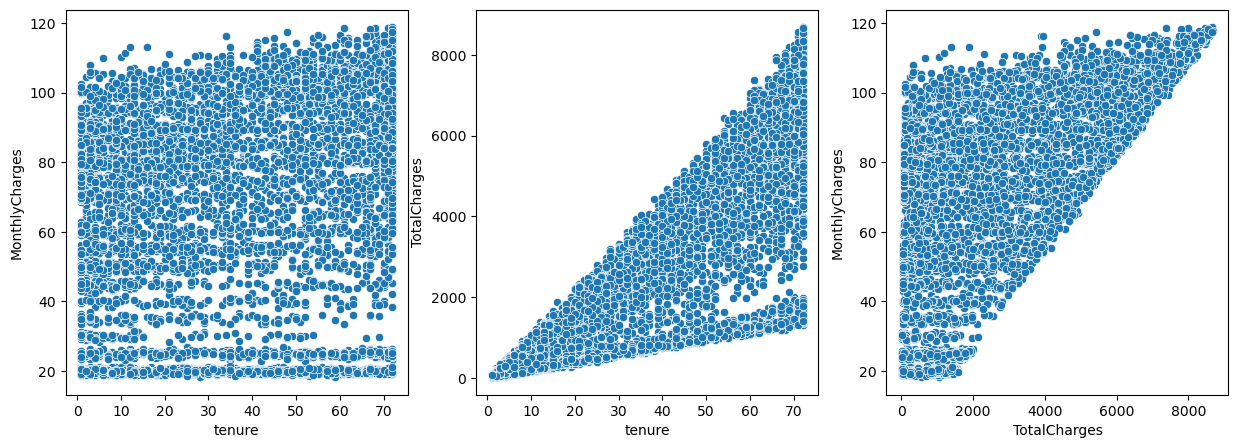

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x=churn["tenure"], y=churn["MonthlyCharges"])
plt.subplot(1,3,2)
sns.scatterplot(x=churn["tenure"], y=churn["TotalCharges"])
plt.subplot(1,3,3)
sns.scatterplot(x=churn["TotalCharges"], y=churn["MonthlyCharges"])
plt.show()

### Numerical vs Categorical

### Tenure
- In this visualization displaying all the distribution of all categorical variables tenure wise

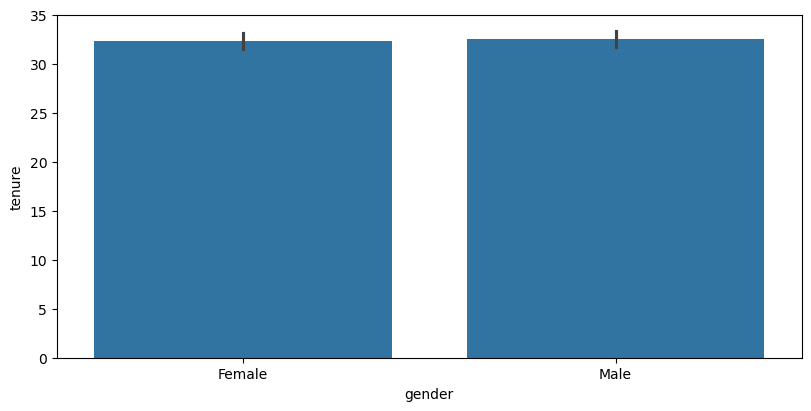

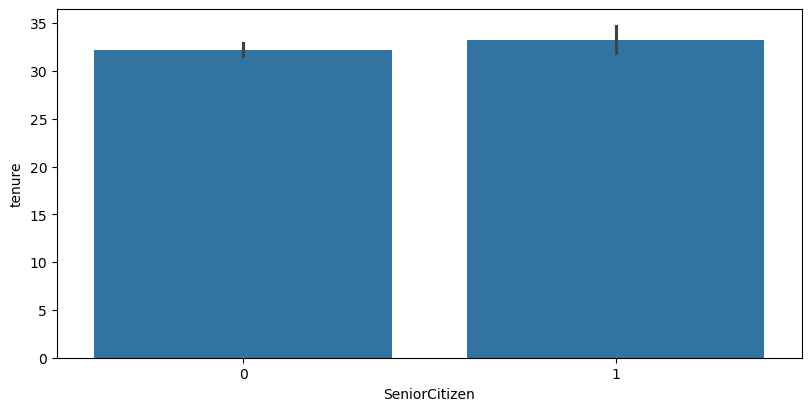

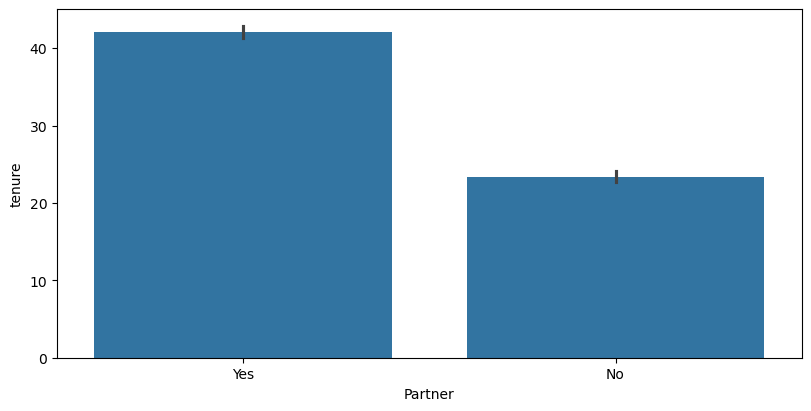

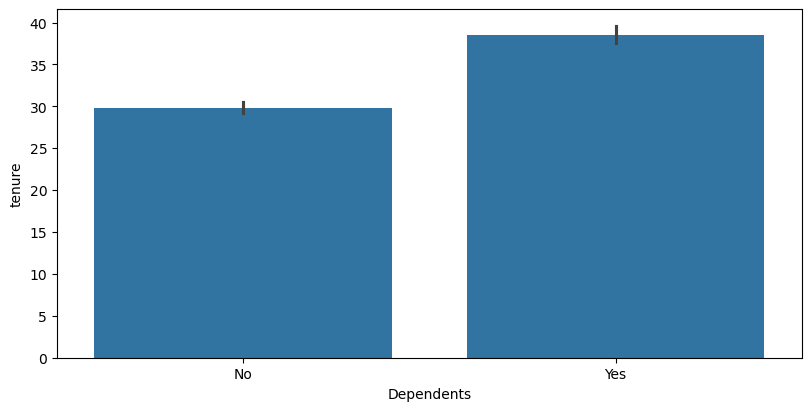

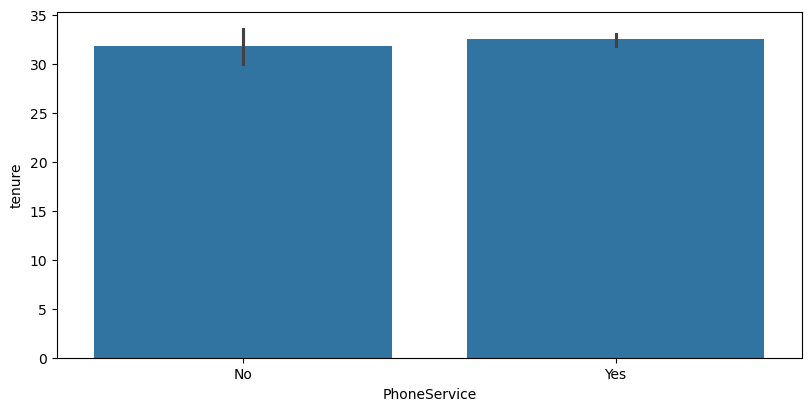

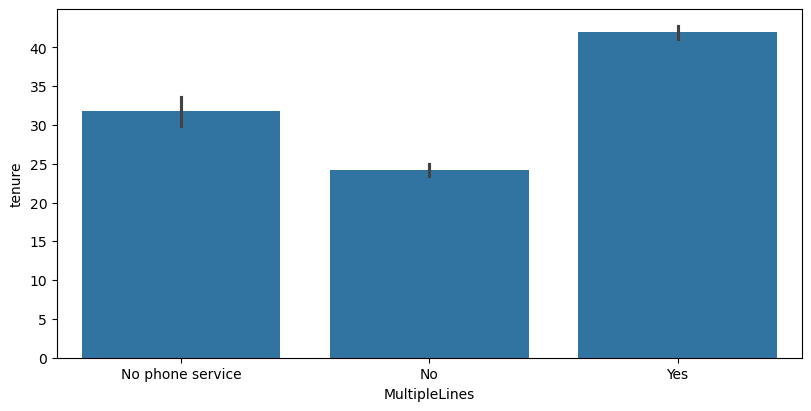

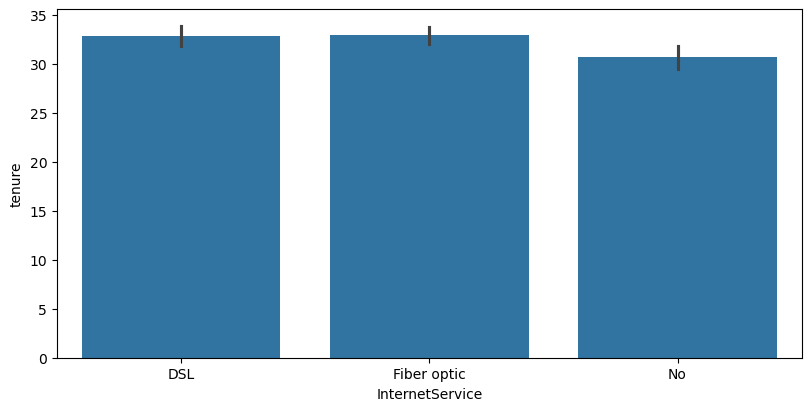

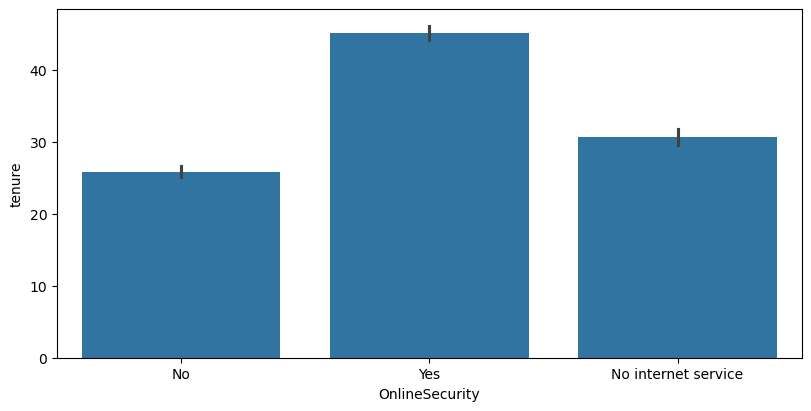

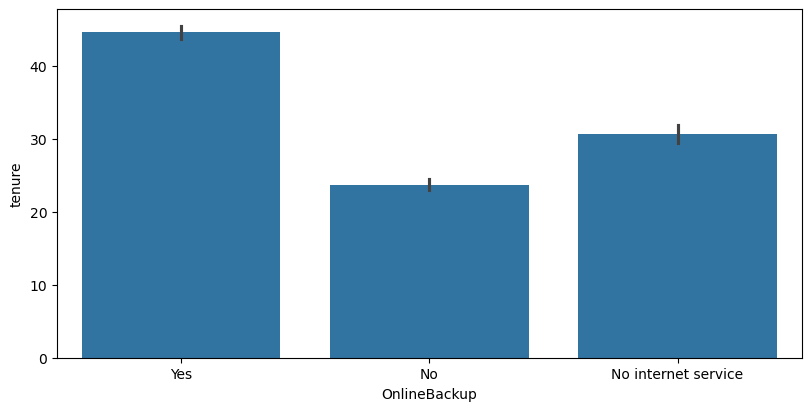

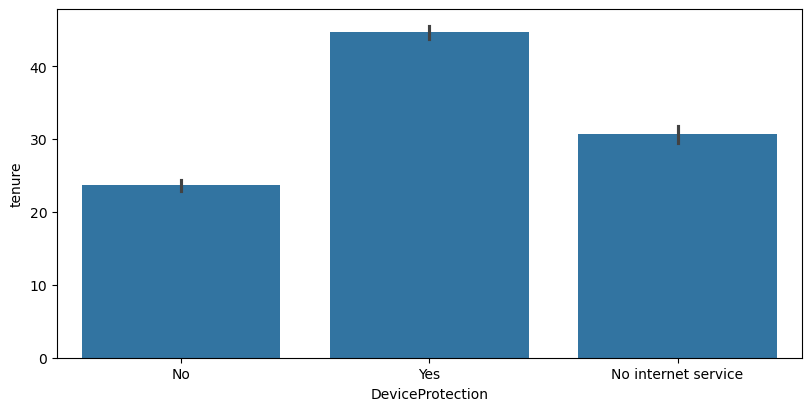

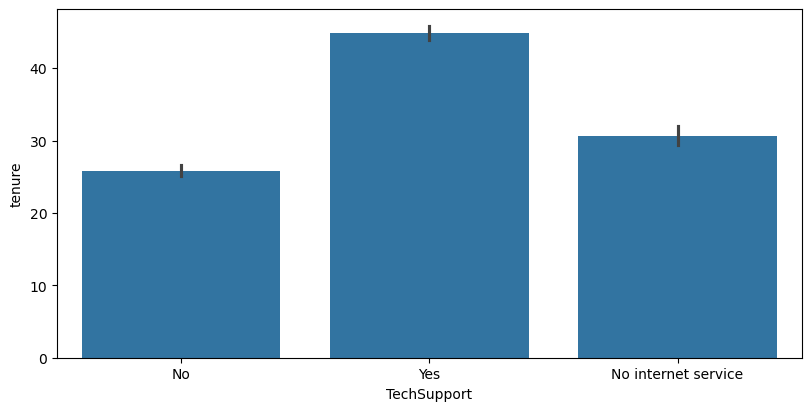

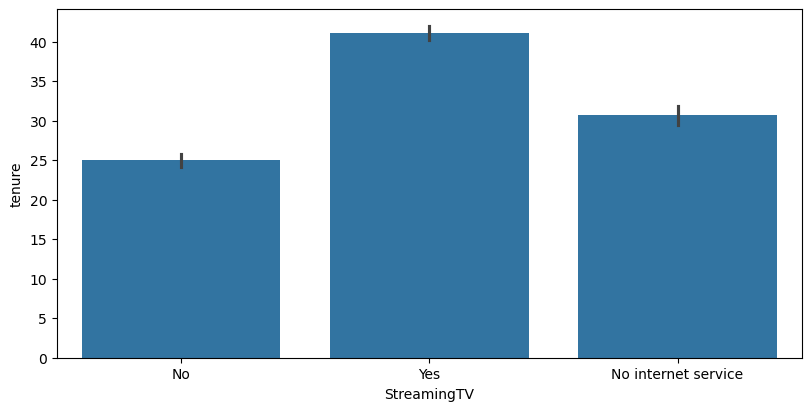

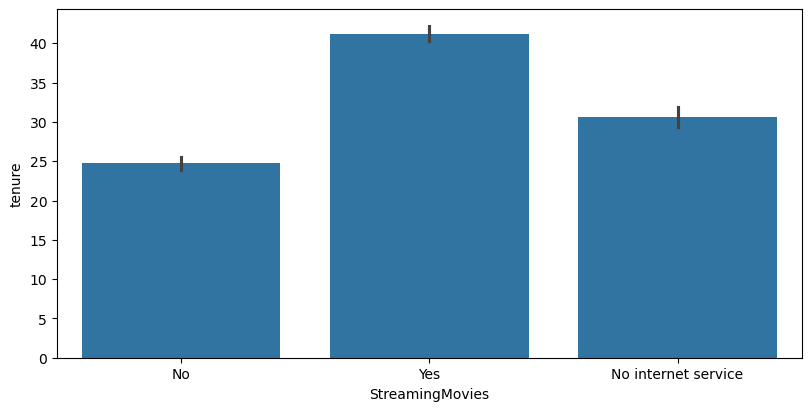

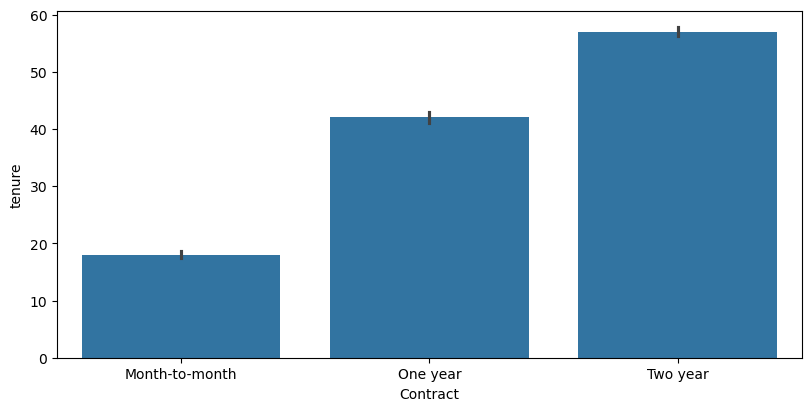

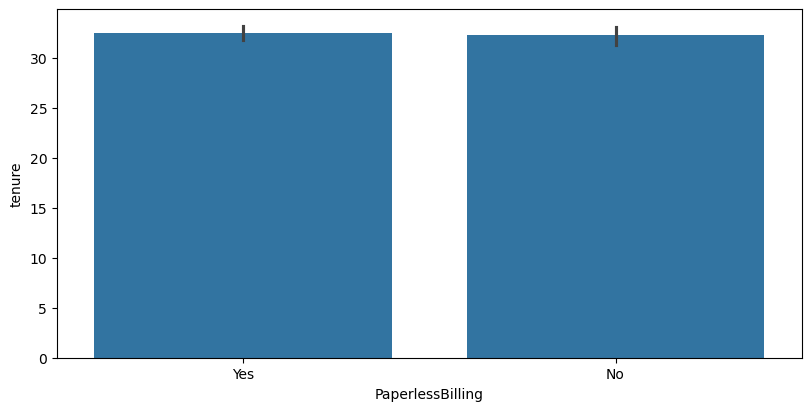

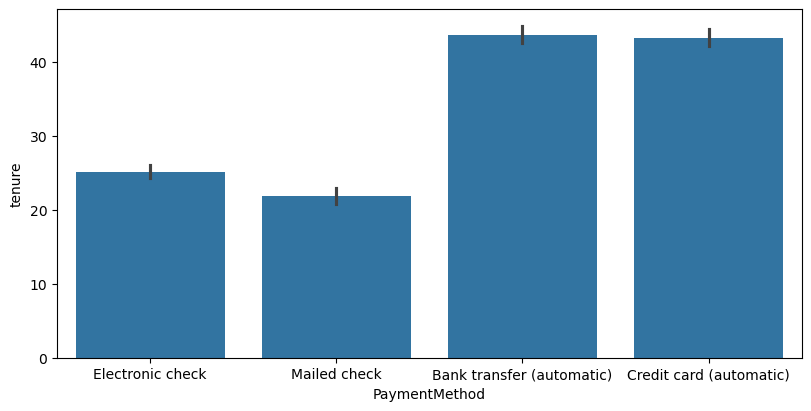

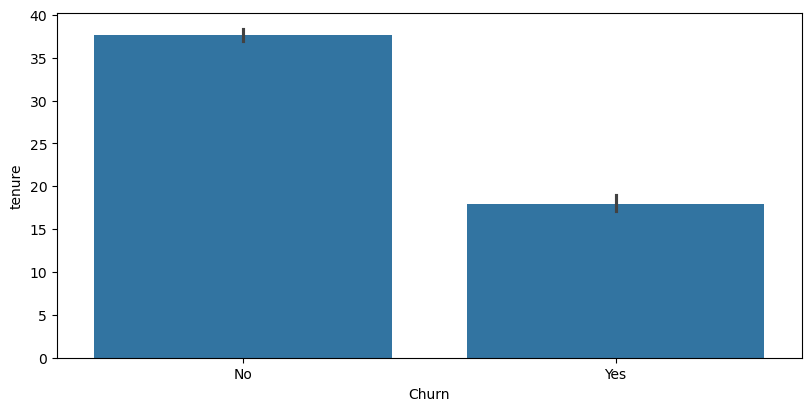

In [18]:
new1=churn.drop(["customerID","tenure","MonthlyCharges","TotalCharges"], axis=1)
for i in new1.columns:
    plt.figure(figsize=(8,4), layout="constrained")
    sns.barplot(x=new1[i], y=churn["tenure"])

### MonthlyCharges
- In this distribution of monthly charges across all categories

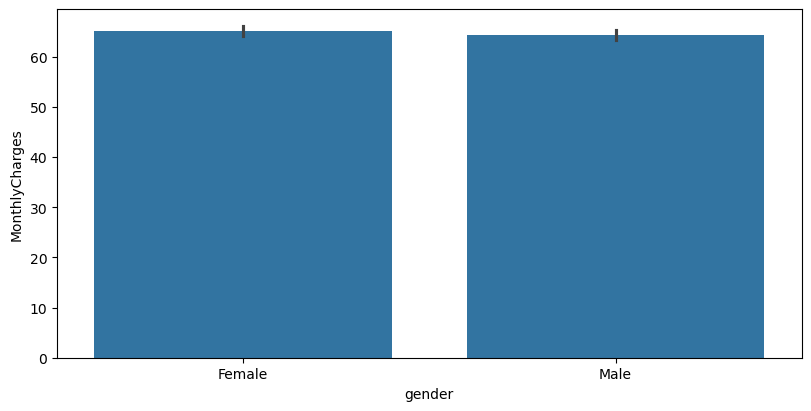

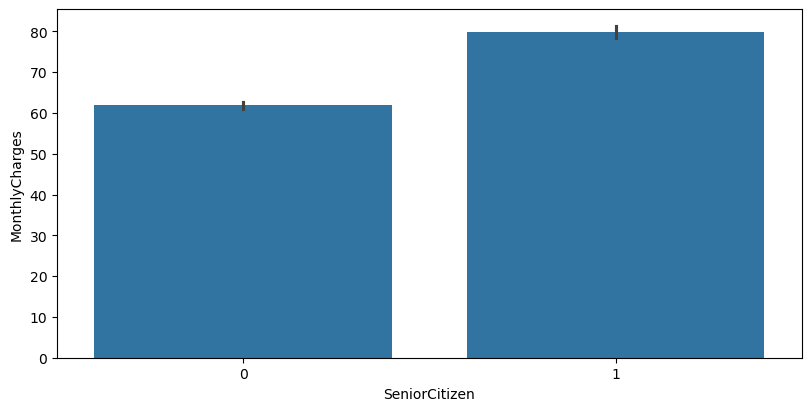

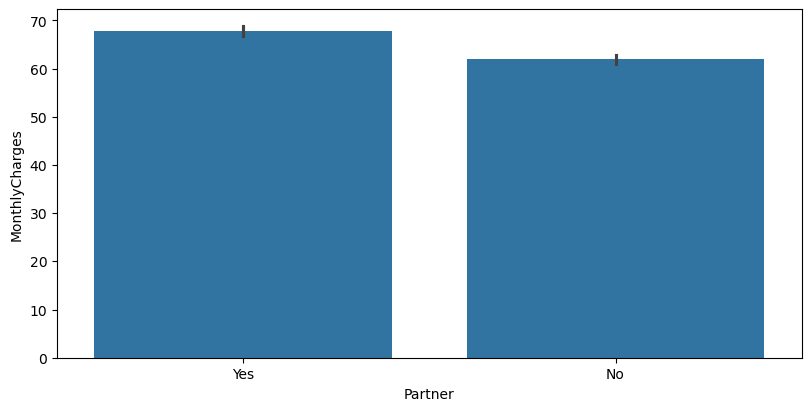

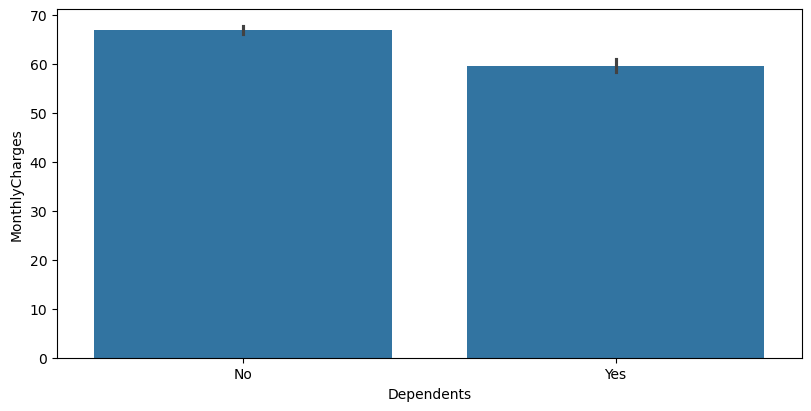

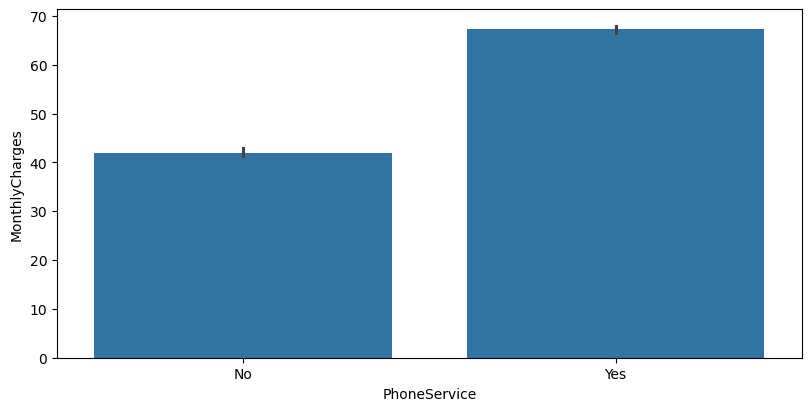

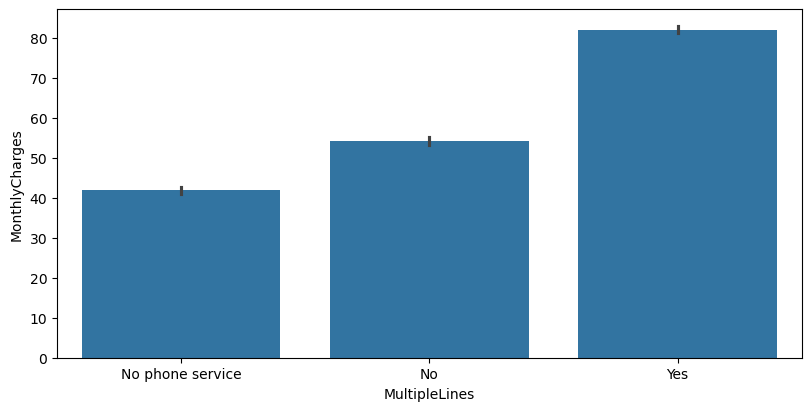

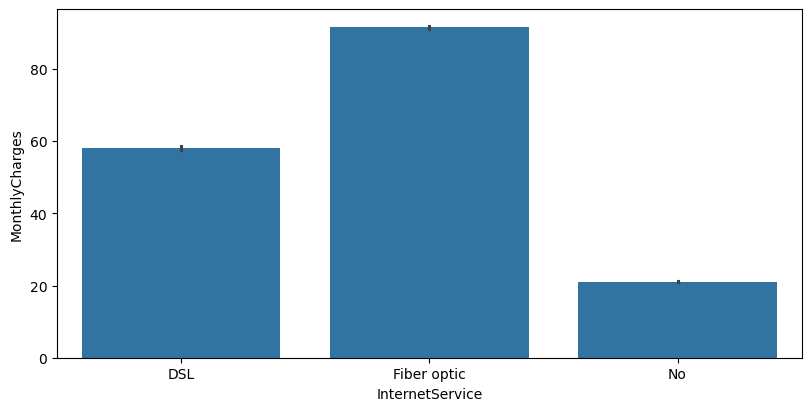

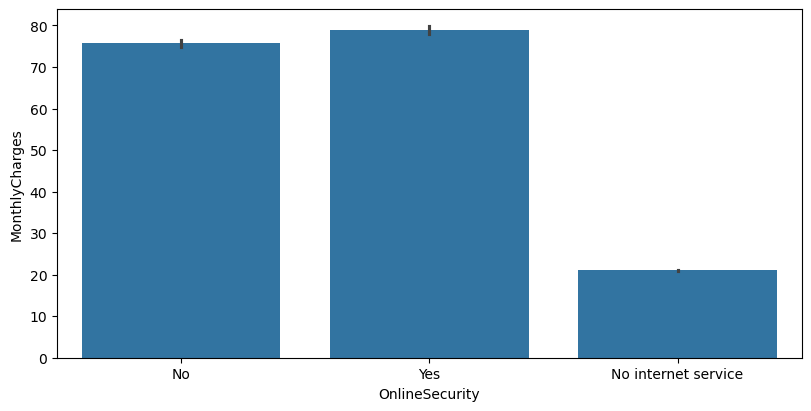

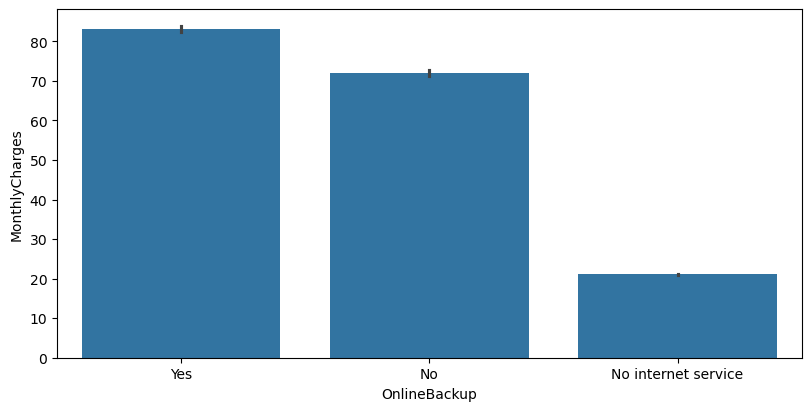

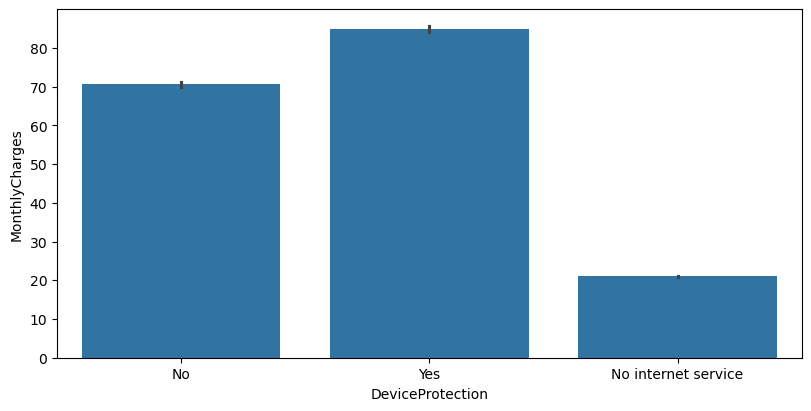

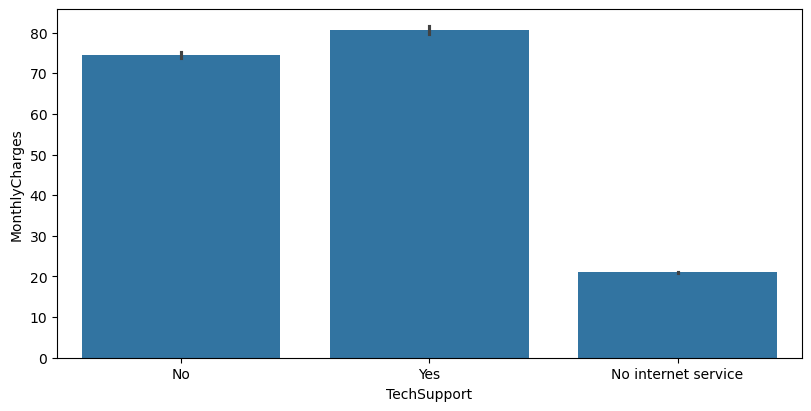

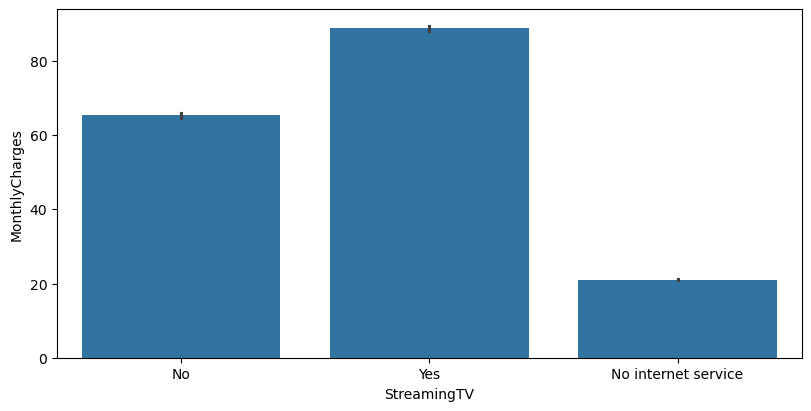

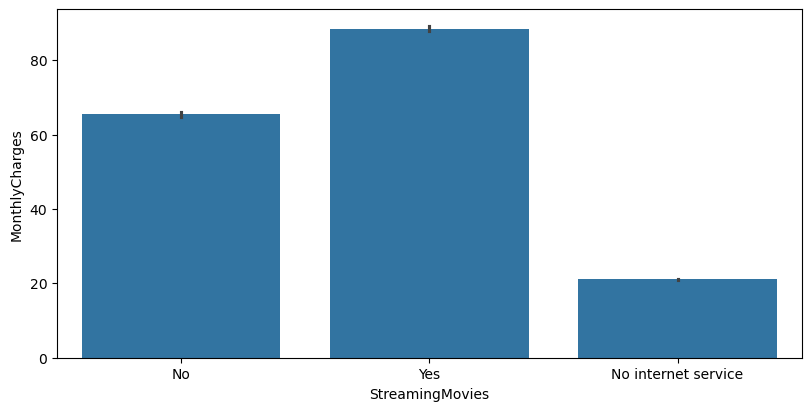

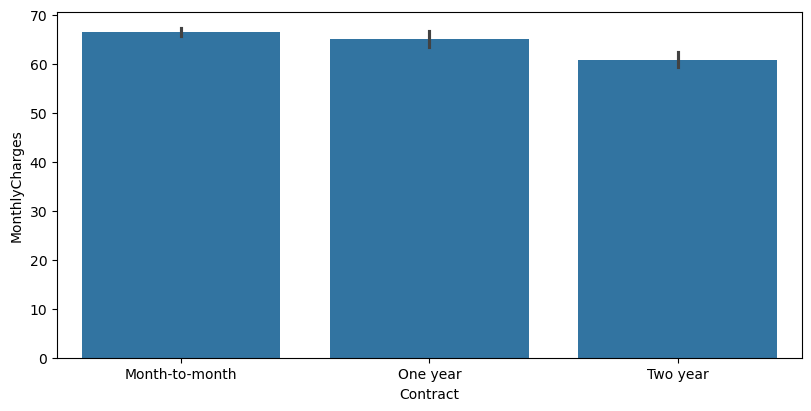

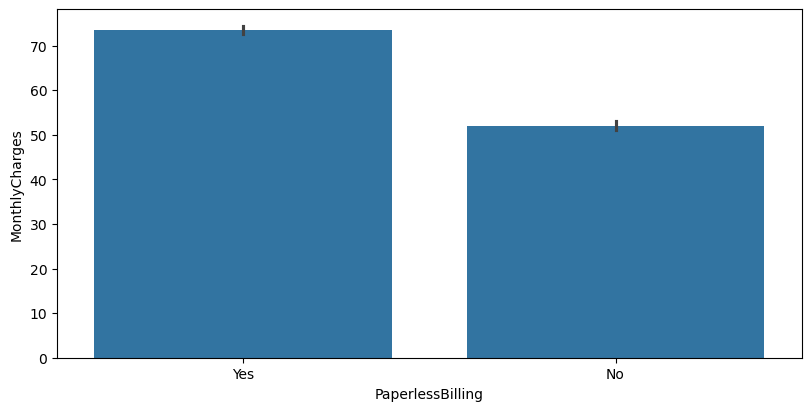

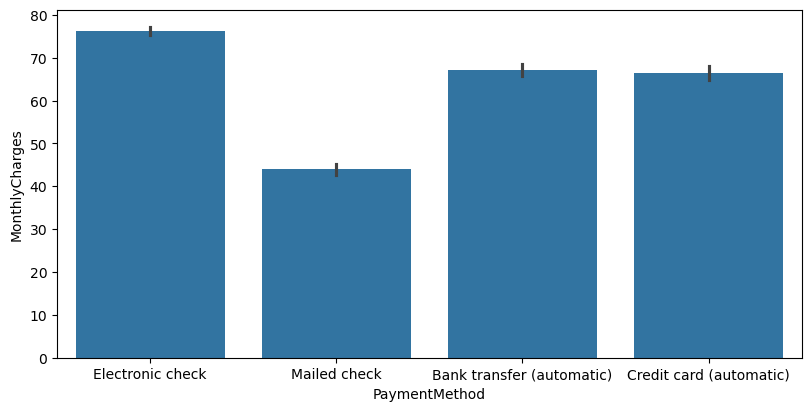

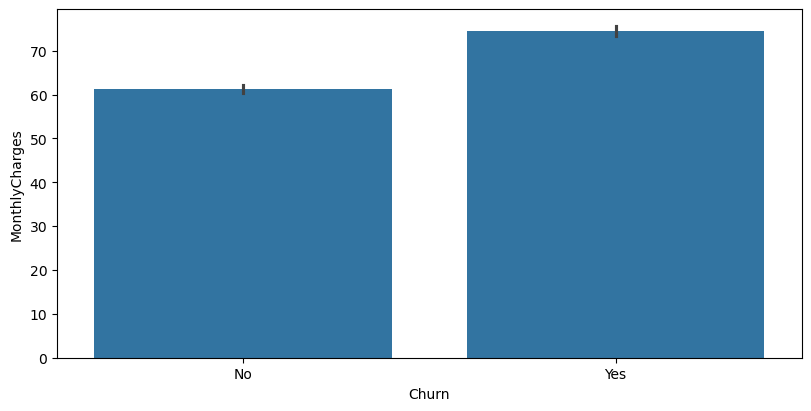

In [19]:
for i in new1.columns:
    plt.figure(figsize=(8,4), layout="constrained")
    sns.barplot(x=new1[i], y=churn["MonthlyCharges"])

### Total Charges
- Distribution of total charges each category wise

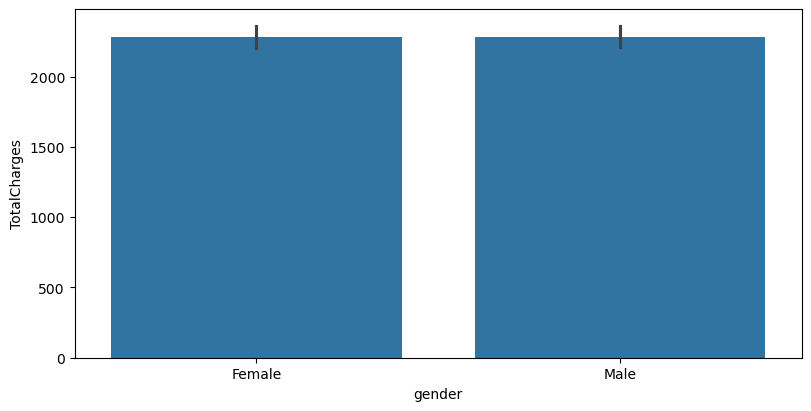

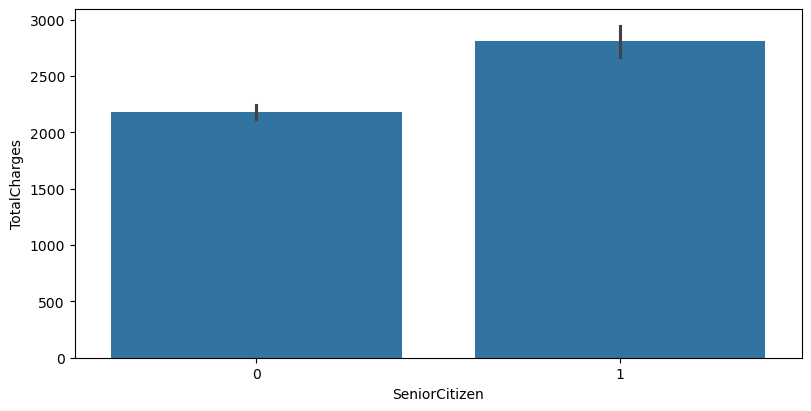

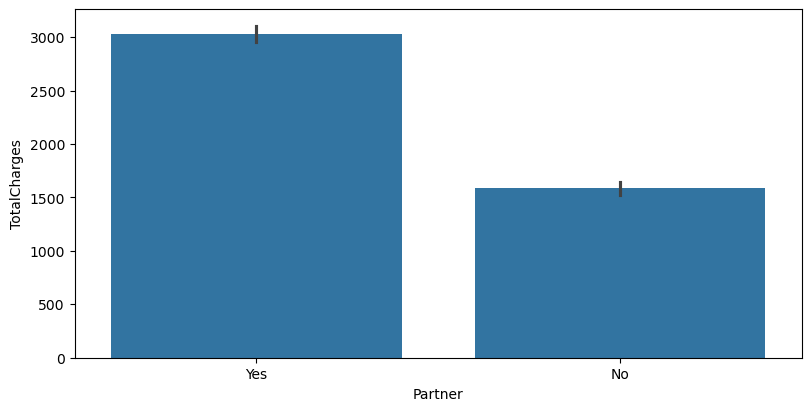

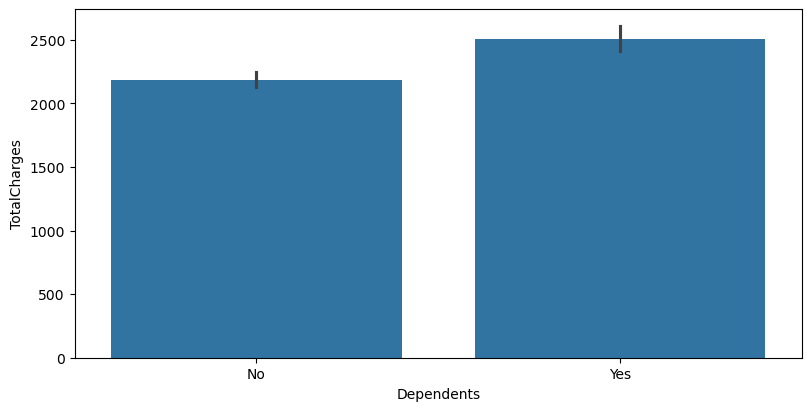

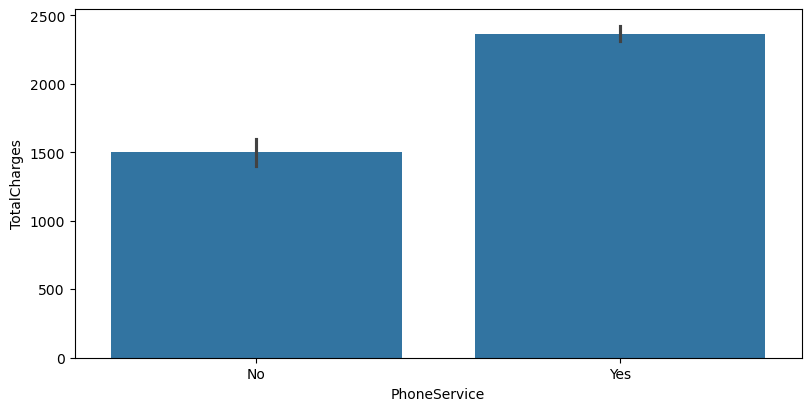

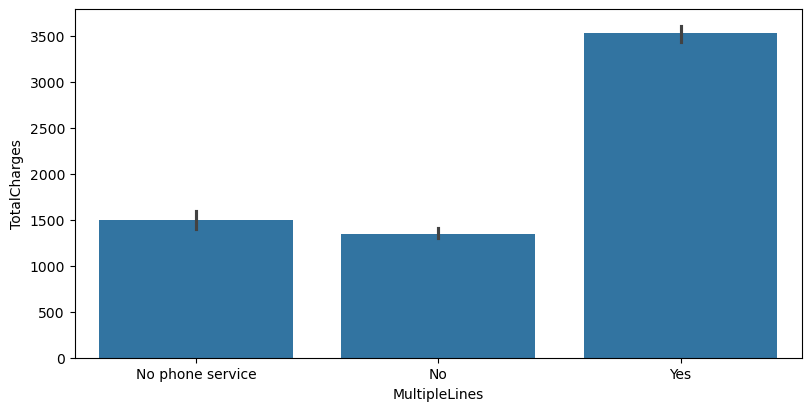

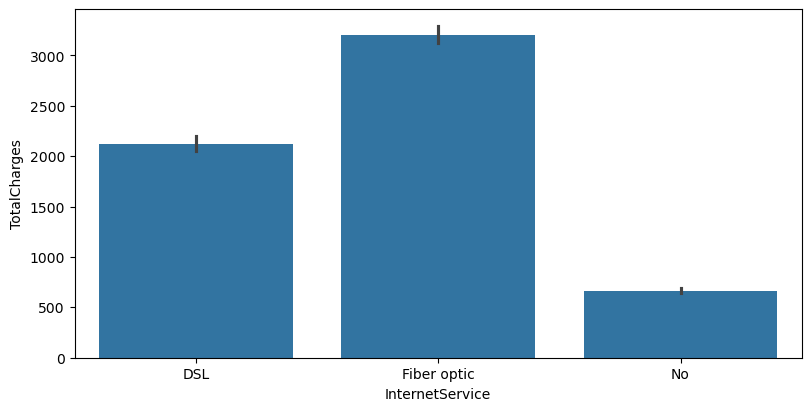

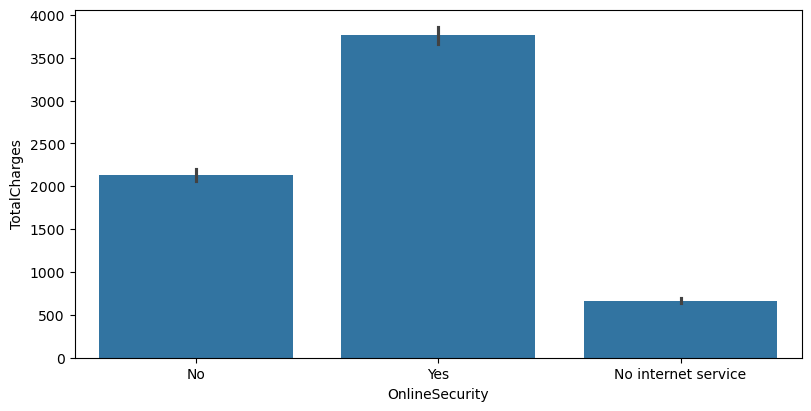

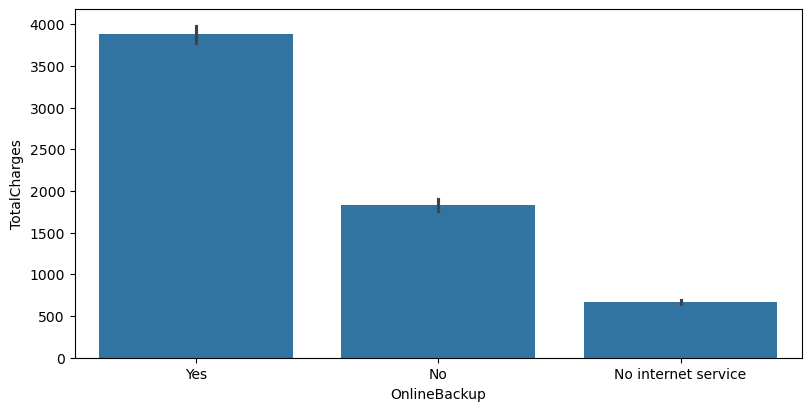

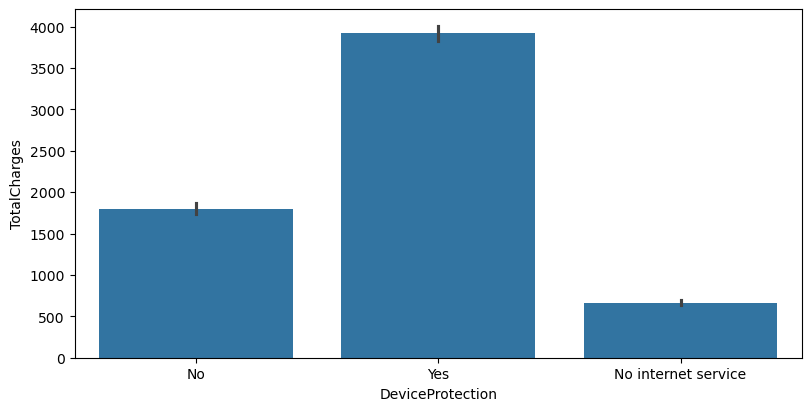

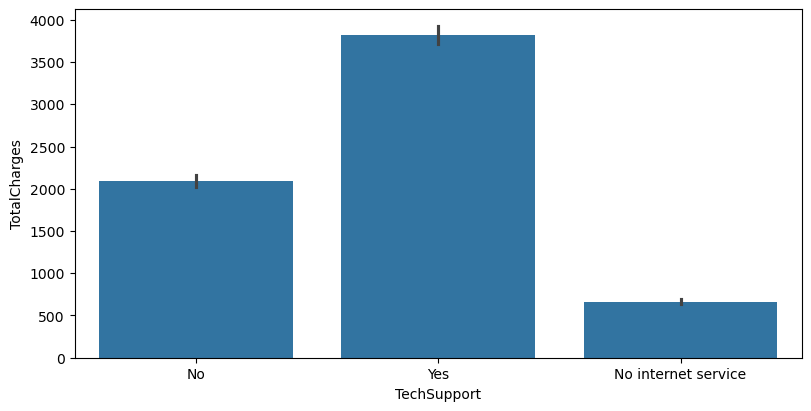

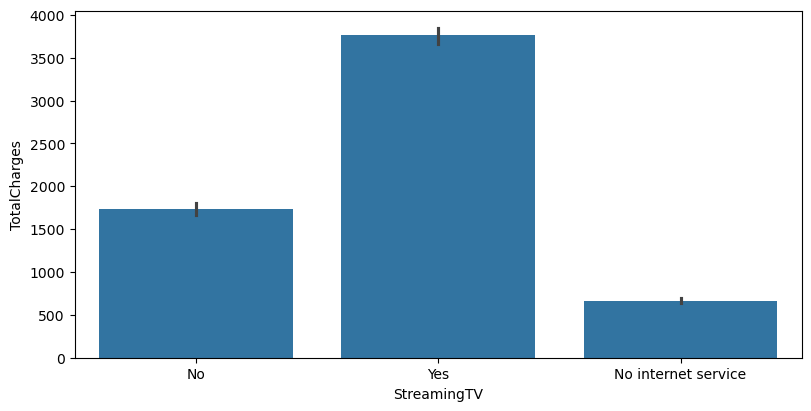

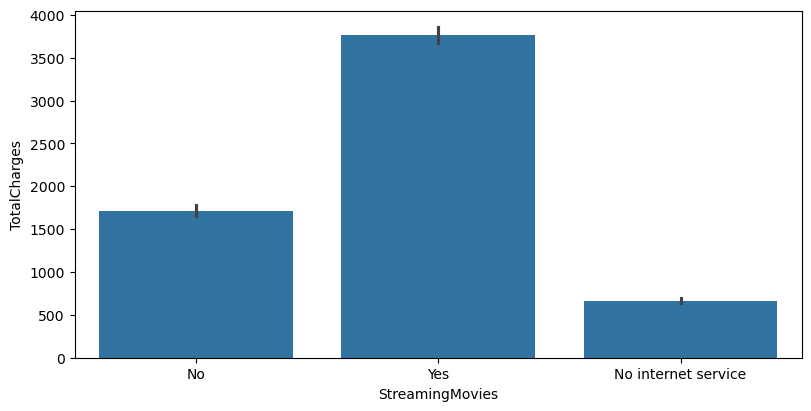

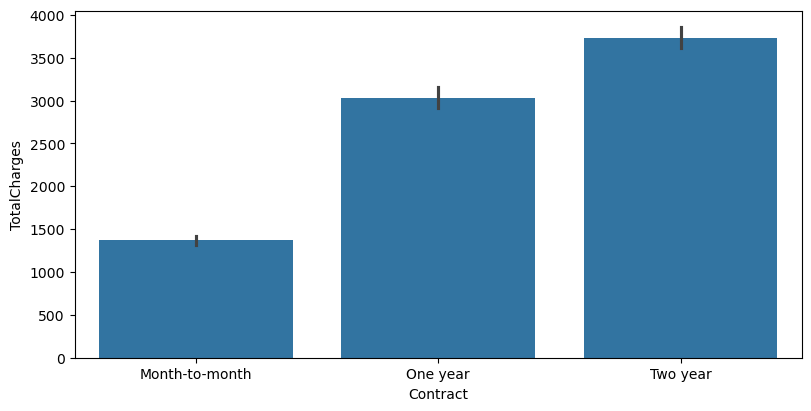

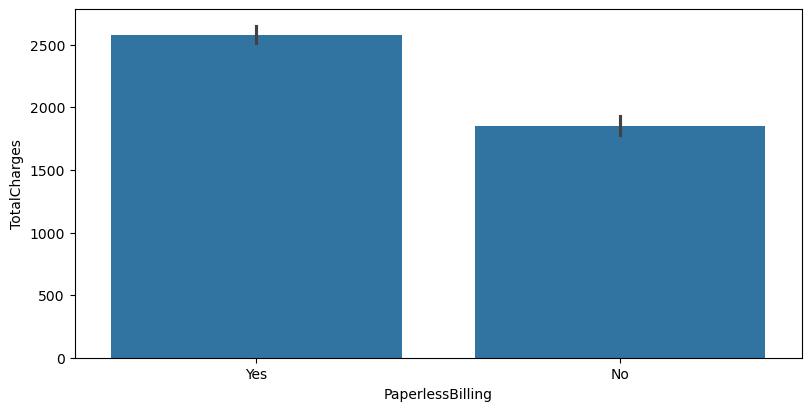

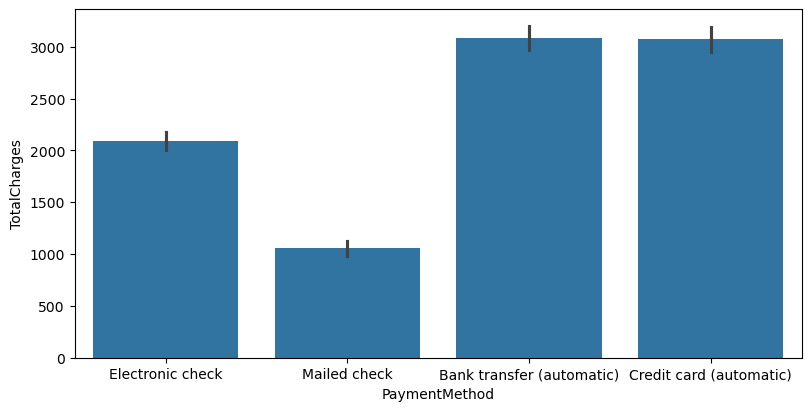

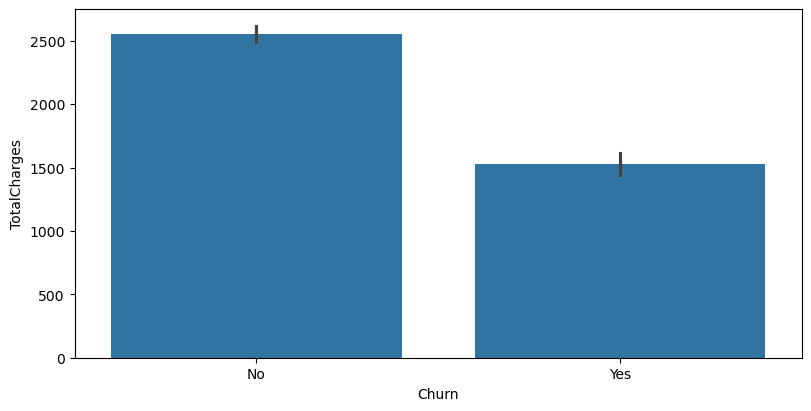

In [20]:
for i in new1.columns:
    plt.figure(figsize=(8,4), layout="constrained")
    sns.barplot(x=new1[i], y=churn["TotalCharges"])

### Categorical vs Categorical

**Gender**: Churn rates are similar across both genders, indicating gender does not significantly affect churn.

**SeniorCitizen**: Senior citizens have a noticeably higher churn rate compared to non-senior customers.

**Partner**: Customers without a partner are more likely to churn than those with a partner.

**Dependents**: Customers without dependents show a higher churn rate than those with dependents.

**PhoneService**: Customers without phone service have a slightly lower churn rate, possibly due to bundled services.

**MultipleLines**: Churn is slightly higher among those with multiple lines than those without.

**InternetService**: Customers with fiber optic service exhibit the highest churn, while those with no internet have the lowest.

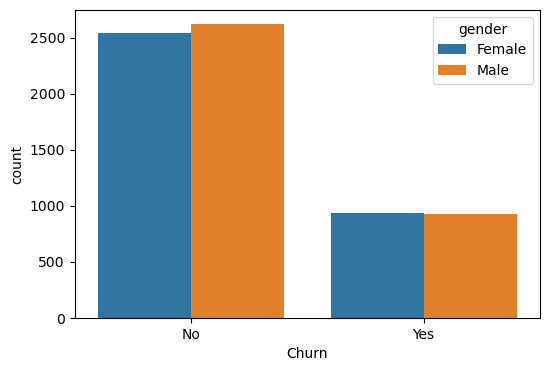

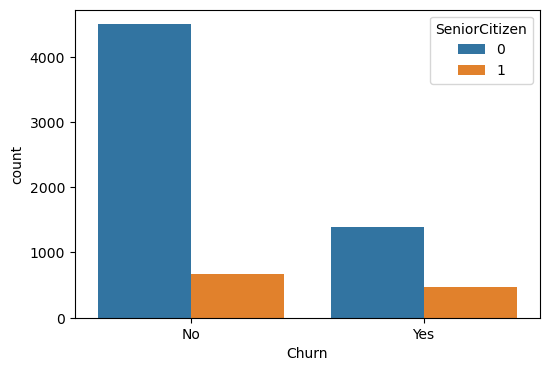

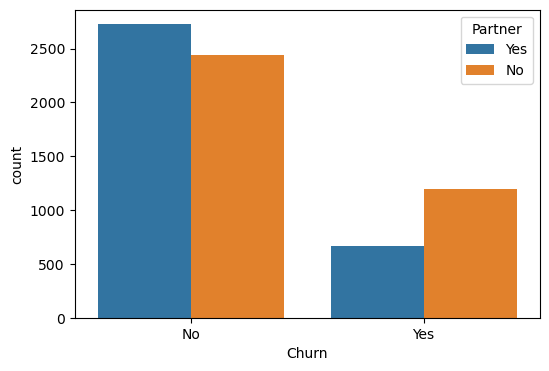

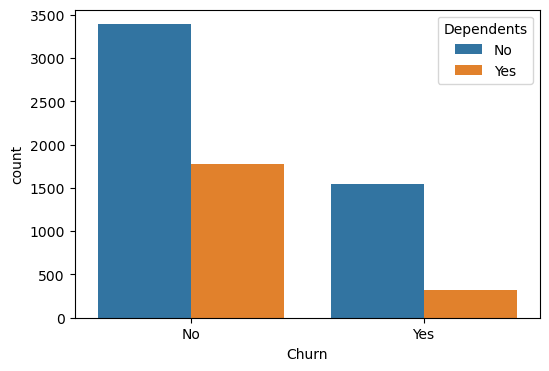

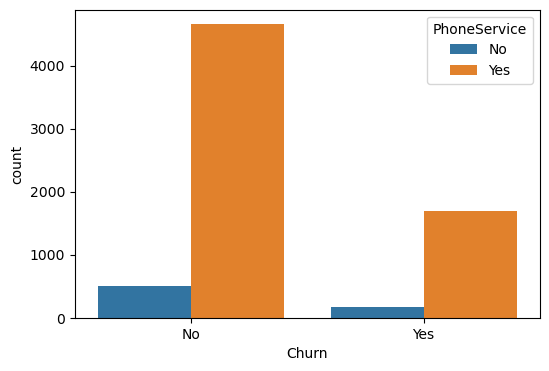

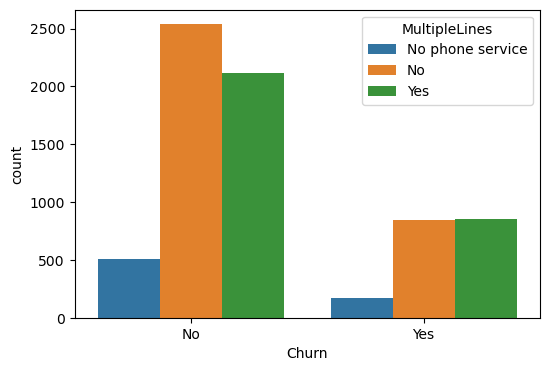

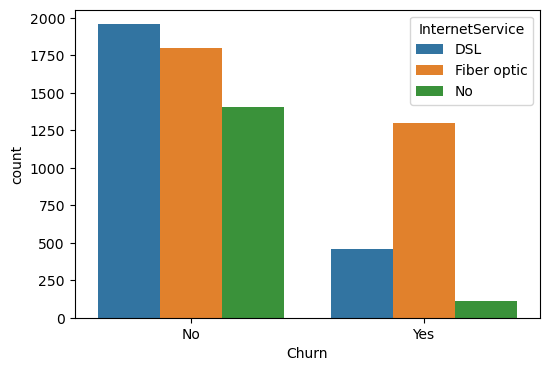

In [21]:
churning1=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
          "InternetService"]
for i in churning1:
    plt.figure(figsize=(6,4))
    sns.countplot(x=churn["Churn"], hue=churn[i])
    plt.show()

**OnlineSecurity:** Customers without online security churn significantly more than those with it.

**OnlineBackup:** Churn is higher among customers who do not use online backup services.

**DeviceProtection:** Customers without device protection tend to churn more than those who have it.

**TechSupport:** Lack of tech support is strongly associated with higher churn.

**StreamingTV:** Streaming TV has a slight association with higher churn, especially when customers use it without other value services.

**StreamingMovies:** Similar to StreamingTV, having streaming movies shows a slight increase in churn likelihood.

**Contract:** Month-to-month contract users have the highest churn rate, while those on longer contracts churn less.

**PaperlessBilling:** Customers using paperless billing show a higher churn rate than those receiving paper bills.

**PaymentMethod:** Customers paying via electronic check churn the most, while those using automatic payments churn less.

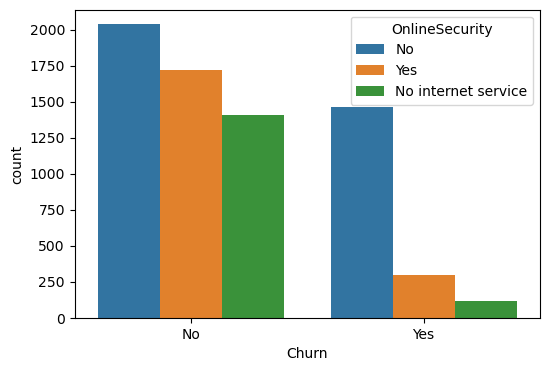

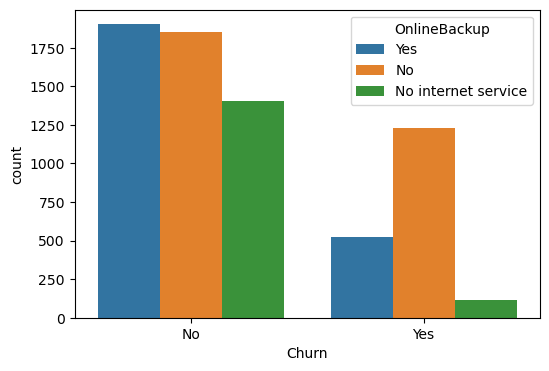

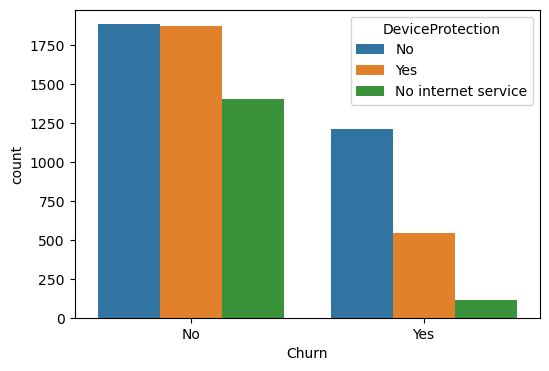

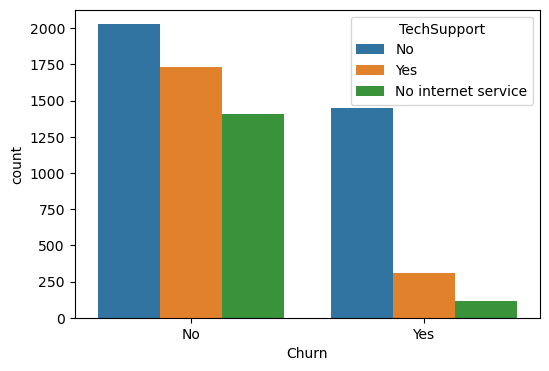

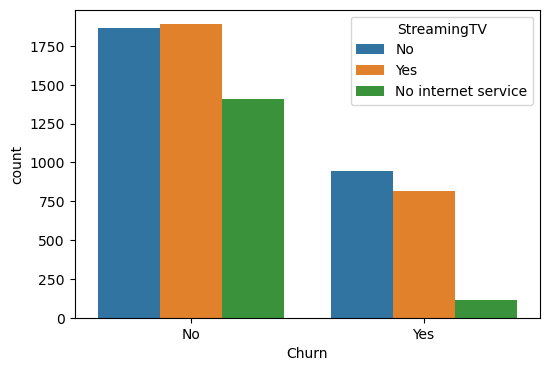

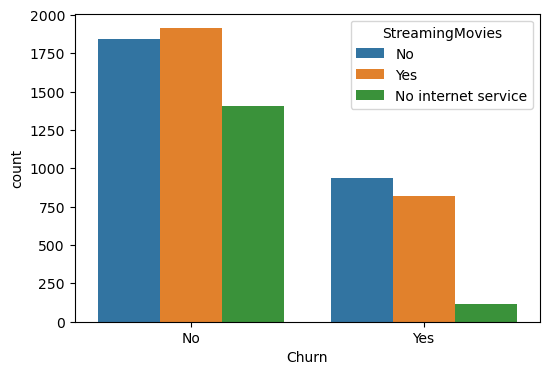

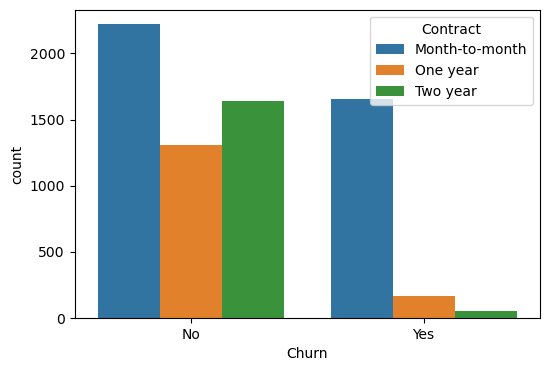

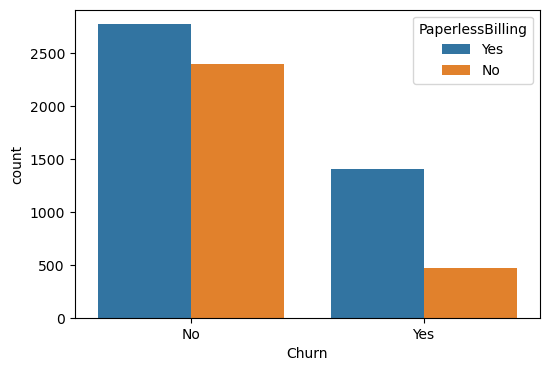

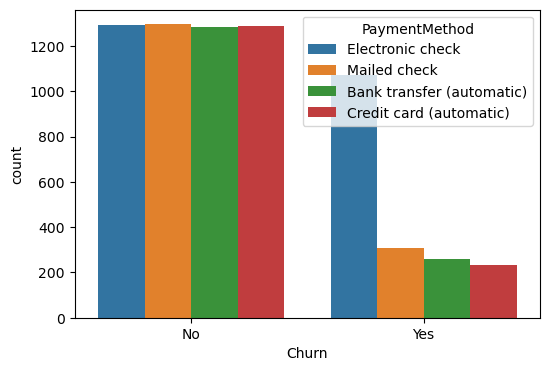

In [22]:
churning2=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
           "Contract","PaperlessBilling","PaymentMethod"]
for i in churning2:
    plt.figure(figsize=(6,4))
    sns.countplot(x=churn["Churn"], hue=churn[i])
    plt.show()

**PaymentMethod**Customers who pay using electronic checks have the highest churn rate, while those using automatic payments (bank transfer or credit card) churn significantly less.

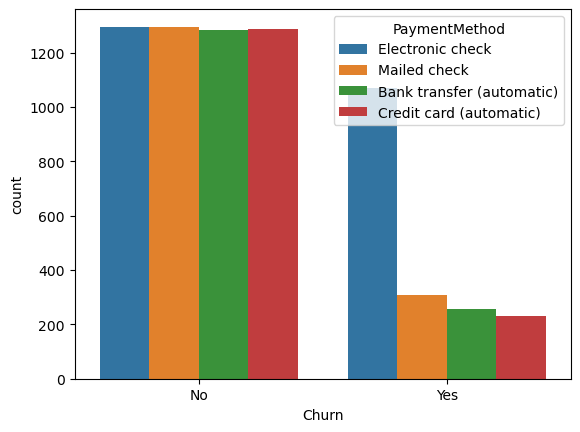

In [23]:
sns.countplot(x=churn["Churn"], hue=churn["PaymentMethod"])
plt.show()

## Multivariate Analysis

### Pairplot

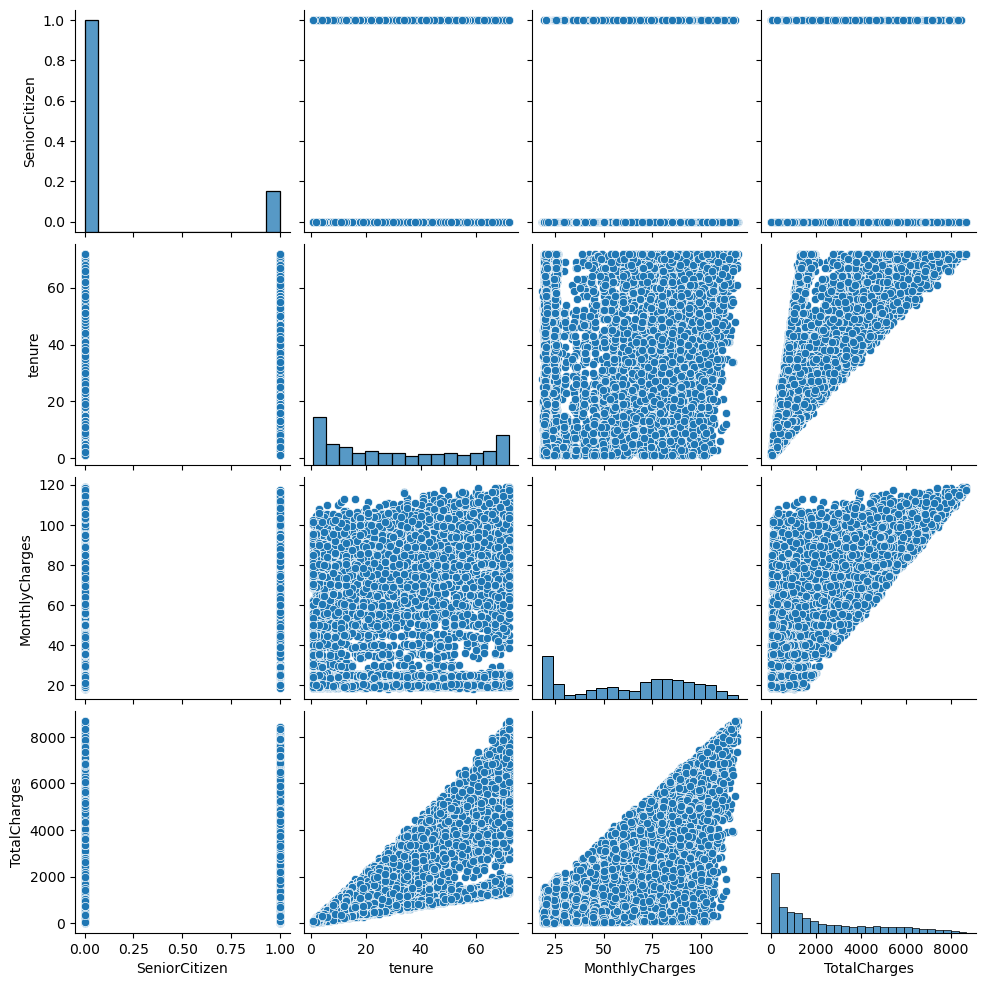

In [24]:
sns.pairplot(churn)

### Heatmap

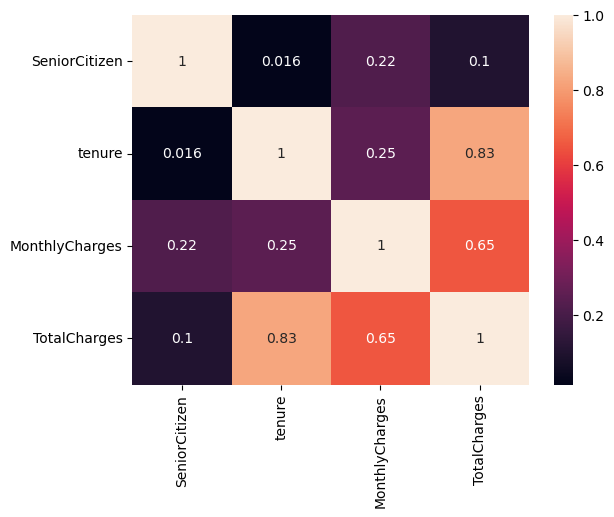

In [25]:
sns.heatmap(churn.corr(numeric_only=True), annot=True)
plt.show()